# Equação de Laplace

De acordo com Steven C. Chapra, a Equação de Laplace pode ser usada para modelar diversos problemas envolvendo o potencial de uma variável desconhecida. Esta equação é útil para problemas que envolvem fluxo de calor, dadas as condições de contorno. Isso a torna importante para aplicação na engenharia, pois há vários casos em que se necessita estudar os fluxos de calor em chapas ou estruturas, para que se projete corretamente o uso de materiais e formatos de estruturas.

No estado estacionário, o fluxo de calor para dentro do elemento em um período unitário $\Delta t$ deve ser igual ao fluxo para fora, como em

\begin{equation}\label{eq:fluxcal}
     q(x)\Delta y \Delta z \Delta t + q(y)\Delta x \Delta z \Delta t = q(x + \Delta x) \Delta y \Delta z \Delta t + q(y + \Delta y) \Delta x \Delta z \Delta t
\end{equation} (1)


sendo $q(x)$ e $q(y)$ os fluxos de calor nas direções $x$ e $y$, respectivamente [$cal/(cm^2 . s)$]. Dividindo por $\Delta z$ e $\Delta t$ e agrupando os termos, obtemos

$$[q(x) - q(x + \Delta x)] \Delta y + [q(y) - q(y + \Delta y)] \Delta x = 0 $$

Multiplicando o primeiro termo por $\frac{\Delta x}{\Delta x}$ e o segundo por $\frac{\Delta y}{\Delta y}$, obtemos

$$ \cfrac {q(x) - q(x + \Delta x)}{\Delta x} \Delta x \Delta y + \cfrac{q(y) - q(y + \Delta y)}{\Delta y} \Delta y \Delta x = 0  $$ 

Dividindo por $\Delta x \Delta y$ e tomando o limite, temos

\begin{equation}\label{eq:consen}
 -\cfrac{\partial q}{\partial x} - \cfrac{\partial q}{\partial y} = 0
\end{equation} (2)

Esta equação é uma equação diferencial parcial que é uma expressão da conservação da energia na placa. Como as condições de contorno são dadas, ela deve ser reformulada em termos da temperatura. A ligação entre o fluxo e a temperatura é fornecida pela lei de condução de calor de Fourier, que pode ser representada por:

\begin{equation}\label{eq:condcal}
 q_i = - k \rho C \cfrac{\partial T}{\partial i}
\end{equation} (3)

sendo $q_i$ o fluxo de calor na direção da dimensão $i$ [$cal/(cm^2.s)$], $k$ o coeficiente de difusividade térmica ($cm^2/s$), $\rho$ a densidade do material ($g/cm^3$), $C$ a capacidade calorífica do material[$cal/(g.º C)$] e $T$ a temperatura, que é definida por

$$ T = \cfrac{H}{\rho C V} $$

sendo $H$ o calor($cal$) e $V$ o volume ($cm^3$). Às vezes, o termo na frente da derivada na equação 3 é tratado como um único termo,

$$ k' = k \rho C $$

sendo $k'$ conhecido como coeficiente de condutividade térmica [$cal/(s . cm . º C)$]. Em ambos os casos, $k$ e $k'$ são parâmetros que refletem o quão bem o material conduz o calor. Assim, a substituição da equação 3 na equação 2 resulta em

$$\cfrac{\partial^2 T}{\partial x^2} + \cfrac{\partial^2 T}{\partial y^2} = 0$$

que é a Equação de Laplace.

Abaixo temos um programa que plota um gráfico para visualização de um problema onde temos temperatura de 100ºC em um dos lados, resolvido de forma analítica.

# Método das Diferenças Finitas

O método das diferenças finitas (MDF) é um método de resolução de equações diferenciais que se baseia na aproximação de derivadas por diferenças finitas. A fórmula de aproximação obtém-se da série de Taylor da função derivada. Hoje, os MDFs são a abordagem dominante das soluções numéricas de equações diferenciais parciais. 

O operador de diferenças finitas para derivada pode ser obtido a partir da série de Taylor para as seguintes funções:

$$ f(x+h) = f(x) + f'(x)h + \cfrac{f''(x)h^2}{2} + \cfrac{f'''(x)h^3}{6} + o(h^4) $$

e

$$ f(x-h) = f(x) - f'(x)h + \cfrac{f''(x)h^2}{2} - \cfrac{f'''(x)h^3}{6} + o(h^4) $$

Portanto, a derivada primeira pode ser escrita de três formas distintas como uma diferença dividida mais um termo de erro, obtido ao desprezar-se termos de ordem superior:

$$ f'(x) = \cfrac{f(x+h) - f(x)}{h} + o(h) $$

que é conhecida como fórmula das diferenças progressivas, ou

$$ f'(x) = \cfrac{f(x) - f(x+h)}{h} + o(h) $$

que é conhecida como fórmula das diferenças regressivas, ou ainda

$$ f'(x) = \cfrac{f(x+h) - f(x-h)}{2h} + o(h^2) $$

que é conhecida como fórmula das diferenças centradas.

Além disso, é possível obter derivadas de ordem superior. A derivada de segunda ordem é obtida a partir de

$$ f(x+h) + f(x-h) = 2f(x) + f''(x)h^2 + o(h^4) $$

e é dada por

$$ f''(x) = \cfrac{f(x+h) - 2f(x) + f(x-h)}{h^2} + o(h^2) $$

que é o método das diferenças finitas para equações diferenciais de segunda ordem, e pode ser aplicado a EDPs, como a de Laplace e a de condução de calor.

## MDF para a Equação de Laplace

Para solucionar esta equação diferencial parcial elíptica, as derivadas parciais de segunda ordem dela são substituídas por diferenças centradas em um ponto, divididas pela variação de posição em x ou y ao quadrado:

$$\cfrac{\partial^2 T}{\partial x^2} = \cfrac{T_{i+1,j} - 2T_{i,j} + T_{i-1,j}}{\Delta x^2}$$

e

$$\cfrac{\partial^2 T}{\partial y^2} = \cfrac{T_{i+1,j} - 2T_{i,j} + T_{i-1,j}}{\Delta y^2}$$


Após substituir essas diferenças na equação inicial e agrupar os termos, obtemos uma equação que depende apenas das temperaturas de quatro nós ao redor (acima, abaixo, a esquerda e a direita) de um nó:

\begin{equation}\label{eq:diflaplace}
    T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1} - 4T_{i,j} = 0
\end{equation}

Esta relação, válida para todos os pontos interiores da placa, é conhecida como equação de diferença de Laplace.

Com isto, dada uma malha com $n \times n$ nós, se obtém um sistema linear com $n$ equações e $n$ incógnitas, de modo que é possível solucioná-la por métodos como eliminação de Gauss ou decomposição em L e U. Porém, para fins computacionais, foi utilizada uma relação iterativa para cada equação, o método de Gauss-Seidel, que consiste em isolar uma das variáveis de cada equação do sistema e iterar até os valores convergirem para valores aproximados aos reais.

### Método Iterativo

Para facilitar o aspecto iterativo do método, o sistema $n\times n$ pode ser abordado pelo Método de Gauss-Seidel, que quando aplicado a equações diferenciais parciais é conhecido como Método de Liebmann. Desta forma, isolando a temperatura do nó em questão para cada equação do sistema, obtemos a equação iterativa:

\begin{equation}
     T_{i,j} = \cfrac{T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1}}{4}
\end{equation}

De modo a refinar os resultados obtidos para cada nó, pode ser utilizada a sobre-relaxação, que acelera a convergência dos resultados usando um fator de multiplicação $\lambda$:

\begin{equation}
    \label{eq:laplace_iterativa}
    T^{novo}_{i,j} = \lambda T^{novo}_{i,j} + (1 - \lambda)T^{velho}_{i,j}
\end{equation}


Assim, as iterações de cada nó são repetidas até que os valores assumidos contenham um erro absoluto menor que certo valor percentual. A estimativa para este erro é dada por:

\begin{equation}
    \label{eq:laplace_erro}
    |(\epsilon_{a})_{i,j}| = \cfrac{|T^{novo}_{i,j} - T^{velho}_{i,j}|}{|T^{novo}_{i,j}|} 100\%
\end{equation}


Após a contextualização matemática das equações e métodos utilizados, foi desenvolvido um programa para solucionar problemas com malhas quadradas de dimensões e valores de contorno fixos com auxílio do professor orientador. Ao longo do desenvolvimento do projeto, conseguimos aprimorar o programa, generalizado para qualquer tamanho de malha retangular, e com iterações baseadas em um valor limite para o erro relativo estimado associado à temperatura em cada ponto do domínio. O programa em Python usando funções criadas pelos autores encontra-se abaixo, e mostramos alguns exemplos de saída do programa para ilustração.

A figura mostra o caso de uma placa com a extremidade direita sendo mantida a 100°C enquato as outras se mantêm a 0°C. O gráfico foi produzido com um erro relativo menor que 10%.

In [ ]:
import numpy as np
from MDF.laplace import malha, solucao_iterativa, solucao_sistemas, colorplot

# limite para o erro
lim = 1.0E-1
# criar malha funcional
n = 30  # numero de pontos do eixo da malha
c = 9  # comprimento da malha
x = np.linspace(0, float(c), n) # eixo x
dx = x[1] - x[0] # passo em x

t1 = 0  # inferior
t2 = 0  # superior
t3 = 0  # esquerda
t4 = 100 # direita
temp = [t1, t2, t3, t4]
fluxo = [False, False, False, False]

T = malha(c, n, temp, fluxo)  # função do pacote MDF.laplace que monta uma malha de c unidades de comprimento dividida em n pontos

# solução
T = solucao_iterativa(T, lim, fluxo, dx, temp) # função que obtem a solução iterativa do problema

#print(T)

# plot
colorplot(T)



ModuleNotFoundError: ignored

### Método por Solução de Sistemas

Também foi desenvolvido um programa em Python que monta e resolve um sistema associado a equação baseado numa malha quadrada cujo número de nós e condições de contorno são definidos pelo usuário. 

O programa constrói a matriz de coeficientes associada à essa malha de acordo com cada nó e sua condições de contorno. O vetor dos termos independentes é formado analisando se o nó analisado possui algum vizinho com uma condição fixa (de contorno) ou não. Tendo armazenado essa matriz e esse vetor, resta apenas usar a função scipy.solve para resolver o sistema de equações, resultando em uma matriz contendo as temperaturas de cada ponto. O resultado é então mostrado graficamente como um mapa de cores bidimensional, ou em gráfico 3D, ende a coordenada vertical representa a temperatura do ponto $(x,~y)$ associado. 

#### Montagem do Sistema

O objetivo é montar um sistema com as equações de diferenças vindas da aproximação das derivadas por diferenças progressivas e regressivas. Para um  ponto qualquer $T_{i, j}$ na malha equacionamos:

\begin{equation*}
    - 4T_{i,j} + T_{i+1,j} + T_{i-1,j} + T_{i,j+1} + T_{i,j-1}  = 0
\end{equation*}

 Esta é a equação que relaciona sua temperatura com as dos pontos ao seu redor.  Numa malha com índices $i$ começando em 0, na primeira linha temos apenas pontos com temperatura constante dada pelas condições de contorno, na segunda linha ($i = 1$) temos as primeiras incógnitas:

\begin{alignat*}{3}
        - 4T_{1,1} + T_{2,1} + T_{0,1} + T_{1,2} + T_{1,0}                      &= 0 \quad \rightarrow \qquad &&\text{Linha 1, Coluna 1}\\
       - 4T_{1,2} + T_{2,2} + T_{0,2} + T_{1,2} + T_{1,0}                       &= 0 \quad \rightarrow \qquad &&\text{Linha 1, Coluna 2}\\
                                                                          ... ~~&=~~ \quad ...         \qquad && ...\\
        - 4T_{1,n-2} + T_{2,n-2} + T_{0,n-2} + T_{1,n-1} + T_{1, n-3}           &= 0 \quad \rightarrow \qquad &&\text{Linha 1, Coluna } n-2\\
        - 4T_{2,1} + T_{3,1} + T_{1,1} + T_{2,2} + T_{2,0}                      &= 0 \quad \rightarrow \qquad &&\text{Linha 2, Coluna 1}\\
                                                                          ... ~~&=~~ \quad ...         \qquad && ...\\
                                                                          ... ~~&=~~ \quad ...         \qquad && ...\\
                  - 4T_{n-2,1} + T_{n-1,1} + T_{n-2,1} + T_{n-2,2} + T_{n-2,0}  &= 0 \quad \rightarrow \qquad &&\text{Linha } n-2\text{, Coluna 1}\\     
                                                                          ... ~~&=~~ \quad ...         \qquad && ...\\
        - 4T_{n-2,n-2} + T_{n-1,n-2} + T_{n-3,n-2} + T_{n-2,n-1} + T_{n-2,n-3}  &= 0 \quad \rightarrow \qquad &&\text{Linha } n-2\text{, Coluna n-2}\\
\end{alignat*}

Como as condições de contorno são para temperaturas constantes, os pontos com índices $0$ ou $n - 1$ sempre são conhecidos, então podemos isolá-los do lado direito. Esses pontos só aparecerão quando analisamos a segunda (índice 1) ou penúltima (índice $n-2$) linha ou coluna. Reescrevendo:

\begin{alignat*}{4}
          - 4T_{1,1} + T_{2,1}  + T_{1,2}             &= -(T_{1,0}+ T_{0,1})          & \quad \rightarrow \qquad &\text{Linha 1, Coluna 1}\\
         - 4T_{1,2} + T_{2,2}  + T_{1,2}              &= -( T_{0,2})                  & \quad \rightarrow \qquad &\text{Linha 1, Coluna 2}\\
                                                ... ~~&=~~                            & \quad ...         \qquad & ...\\
          - 4T_{1,n-2} + T_{2,n-2}  + T_{1, n-3}      &= -(T_{0,n-2} + T_{1,n-1})     & \quad \rightarrow \qquad &\text{Linha 1, Coluna } n-2\\
           - 4T_{2,1} + T_{3,1} + T_{1,1} + T_{2,2}   &= -(T_{2,0})                   & \quad \rightarrow \qquad &\text{Linha 2, Coluna 1}\\
                                                ... ~~&=~~                            & \quad ...         \qquad & ...\\
                                                ... ~~&=~~                            & \quad ...         \qquad & ...\\
    - 4T_{n-2,1} + T_{n-1,1} + T_{n-2,1} + T_{n-2,2}  &= -( T_{n-2,0})                & \quad \rightarrow \qquad &\text{Linha } n-2\text{, Coluna 1}\\     
                                                ... ~~&=~~                            & \quad ...         \qquad & ...\\
        - 4T_{n-2,n-2}  + T_{n-3,n-2}  + T_{n-2,n-3}  &= -(T_{n-2,n-1} + T_{n-1,n-2}) & \quad \rightarrow \qquad &\text{Linha } n-2\text{, Coluna n-2}\\
\end{alignat*}


#### Simplificação


Se reduzirmos a malha e analisarmos o caso mais simples, onde há apenas um termo que não tem nenhuma condição de contorno ao seu redor (malha 5 $\times$ 5, apenas o termo $T_{2,2}$ não possui condições de contorno), temos:

\begin{align*}
        - 4T_{1,1} + T_{2,1}  + T_{1,2}                    &= -(T_{1,0}+ T_{0,1})                   \\
       - 4T_{1,2} + T_{2,2} + T_{1,1}  + T_{1,2}                    &= -( T_{0,2})                                  \\
        - 4T_{1,3} + T_{2,3}  + T_{1, 2}                  &= -(T_{0,3} + T_{1,4}) \\
        - 4T_{2,1} + T_{3,1} + T_{1,1} + T_{2,2}    &= -(T_{2,0})                    \\
        - 4T_{2,2} + T_{3,2} + T_{1,2} + T_{2,3} + T_{2, 1}   &= 0\\
        - 4T_{2,3} + T_{2,2} + T_{3,3} + T_{1,3} &= -(T_{2,4})\\
        - 4T_{3,1} + T_{3,2}  + T_{2,1}  &= -(T_{3,0}+T_{4,1}) \\     
         - 4T_{3,2} + T_{3,1}  + T_{3,3} + T_{2,2} &= -(T_{4,2}) \\
        - 4T_{3,3}  + T_{3,2}  + T_{2,3}  &= -(T_{3,4} + T_{4,3})   
\end{align*}

Essas equações podem ser representadas em forma matricial como:

\begin{equation}
\begin{bmatrix}
-4 & 1 &  & 1\\
1 & -4 & 1 &  & 1\\
 & 1 & -4 & 0 &  & 1\\
1 &  & 0 & -4 & 1 &  & 1\\
 & 1 &  & 1 & -4 & 1 &  & 1\\
 &  & 1 &  & 1 & -4 & 0 &  & 1\\
 &  &  & 1 &  & 0 & -4 & 1\\
 &  &  &  & 1 &  & 1 & -4 & 1\\
 &  &  &  &  & 1 &  & 1 & -4
\end{bmatrix}
\begin{Bmatrix}
T_{1,1}\\
T_{1,2}\\
T_{1,3}\\
T_{2,1}\\
T_{2,2}\\
T_{2,3}\\
T_{3,1}\\
T_{3,2}\\
T_{3,3}
\end{Bmatrix}=
\begin{Bmatrix}
-(T_{1,0}+T_{0,1})\\
-(T_{0,2})\\
-(T_{0,3}+T_{1,4})\\
-(T_{2,0})\\
0\\
-(T_{2,4})\\
-(T_{3,0}+T_{4,1})\\
-(T_{4,2})\\
-(T_{3,4}+T_{4,3})
\end{Bmatrix}
\end{equation}


E de forma compacta:

\begin{equation}
  \mathbf{A}\{x\} = \{b\}  
\end{equation}


Onde $\mathbf{A}$ é a matriz dos coeficientes, $\{x\}$ é o vetor das incógnitas e  $\{b\}$ o vetor dos termos independentes. O  vetor $\{x\}$ foi montado percorrendo a malha de linha em linha, assim a matriz $\mathbf{A}$ tem esse aspecto para essa configuração específica.

É fácil perceber que em uma malha maior os $n$ primeiros termos do vetor $\{x\}$ terão condições de contorno, assim como os $n$ últimos e entre esses blocos de valores apenas o primeiro e o último ponto de cada linha terá. Qualquer outro ponto não terá valores conhecidos ao seu redor, assim o lado direito das suas equações de diferenças será sempre zero.

O programa que demonstra essa solução se encontra abaixo.

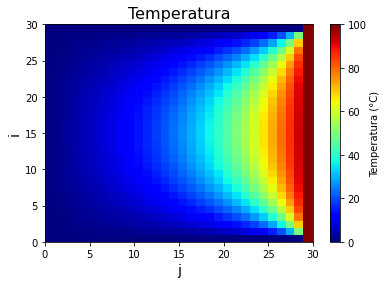

In [ ]:
T = solucao_sistemas(T, temp)  # FUNCIONANDO (AINDA SEM FLUXO)

colorplot(T)